In [1]:
#ライブラリのインポート
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

#グラフの見た目変更
plt.style.use("ggplot")

#乱数のSeedを固定
np.random.seed(999)

In [2]:
#Beta分布のパラメータ指定
a,b=1.5,2

#x座標定義
x=np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b),100)

In [3]:
#初期値
theta=0.8

#モンテカルロステップ数
NMCS=20000

#ランダムウォークの1ステップでの動く幅
epsilon=0.5

In [4]:
#モンテカルロステップごとのthetaの値を入れるリスト
theta_mcs=[theta]

#モンテカルロ計算
for i in range(NMCS):
    theta_new=theta+epsilon*np.random.randn()
    if beta.pdf(theta_new,a,b)>beta.pdf(theta,a,b):
        theta=theta_new
    else:
        r=beta.pdf(theta_new,a,b)/beta.pdf(theta,a,b)
        if np.random.rand() < r:
            theta=theta_new
    theta_mcs.append(theta)

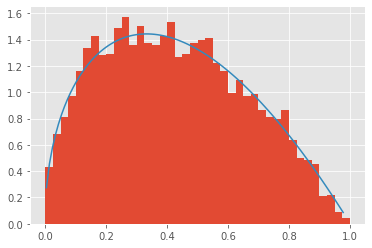

In [6]:
#バーンインの期間を除いておく
plt.hist(theta_mcs[1000:],density=True,bins=40)
plt.plot(x,beta.pdf(x,a,b))
plt.savefig('./figure/fig_Metropolis-Hastings')
plt.show()